In [3]:
# ------- file: myplot.py ------
import  matplotlib.pyplot as plt
import  numpy as np
import  scipy
from    scipy.optimize import curve_fit

from    scipy.stats import ks_2samp


In [13]:
infile = 'test.npy'
with open(infile, 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

Read an array: (105045, 64, 32)


In [14]:
def landau(x, *par):
    w = x - par[0]
    return par[1]*np.exp(-(w+np.exp(-par[4]*w))/par[2])+par[3]

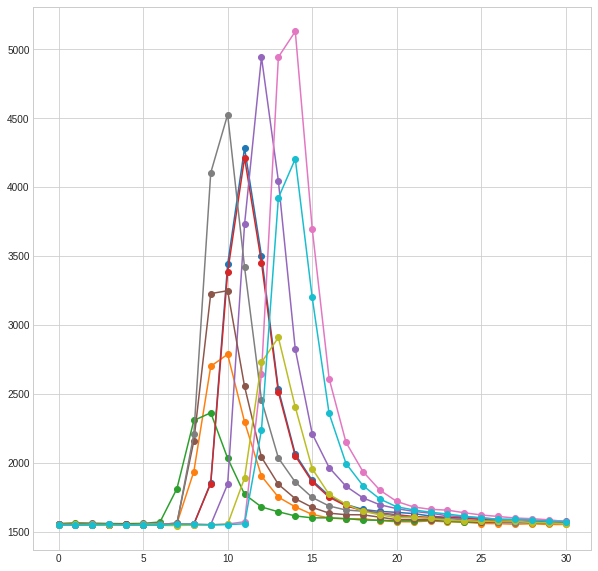

In [33]:
x = np.linspace(0, 31, 31, endpoint=False)
# print('Linspace:', x)
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,10)

guess = [
    1000,    # vertical scale
    10,     # time
    2,      # p2
    10,      # p3
    1500,   # pedestal
    10,     # p5
    10       # p6
    ]

# popt, _ = scipy.optimize.curve_fit(nrm, x, wave, p0=[10, 100, 10, 1500]) # , p0=guess)
# popt, _ = scipy.optimize.curve_fit(plde, x, wave, p0=guess)


x1 = np.linspace(0, 30, 300, endpoint=False)

first   = True
cnt     = 0

for i in range(0,5000):
    if(first):
        first = False
        continue

    wave        =   X[i][17][:31]

    pedestal = np.average(wave[0:5]) # print(wave) print(pedestal)
    std      = np.std(wave[0:5])

    if(pedestal>1700 or std>7): continue

    maxindex    =   np.argmax(wave[2:20])
    maxval      =   wave[maxindex]

    if maxval > 1700:
        plt.plot(x, wave, 'o', linestyle='solid')
        cnt+=1
        if cnt==10: break

##   popt, _ = scipy.optimize.curve_fit(landau, x, wave[i], p0=[10, 200, 10, 1500,1 ]) # , p0=guess)
    # print(popt)
##    plt.plot(x1, landau(x1, *popt))

    # residual sum of squares
##    ss_res = np.sum((wave[i] - landau(x, *popt)) ** 2)

    # total sum of squares
##    ss_tot = np.sum((wave[i] - np.mean(wave[i])) ** 2)

    # r-squared
##    r2 = 1 - (ss_res / ss_tot)


    #perform Kolmogorov-Smirnov test
##   ks = ks_2samp(wave[i], landau(x, *popt))
    
##   print("R2: ", r2, ' KS: ', ks)

#plt.plot(x, wave[1], 'o')
#popt, _ = scipy.optimize.curve_fit(landau, x, wave[1], p0=[10, 200, 10, 1500,1 ]) # , p0=guess)
# print(popt)
#plt.plot(x1, landau(x1, *popt))


 